## Honour Code
I BONGANI, NDLOVU, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [35]:
var_defs = pd.read_csv('Xente_Variable_Definitions.csv')
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')

sample_sub = pd.read_csv('sample_submission.csv')

In [3]:
var_defs.head(20)

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [4]:
train_df.head(20)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [36]:
test_df.head(20)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2
5,TransactionId_134338,BatchId_67575,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:03:12Z,2
6,TransactionId_109096,BatchId_52375,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:03:48Z,2
7,TransactionId_14249,BatchId_112552,AccountId_2908,SubscriptionId_2977,CustomerId_3332,UGX,256,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:09:46Z,1
8,TransactionId_69896,BatchId_60867,AccountId_4841,SubscriptionId_3829,CustomerId_3332,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:11:24Z,2
9,TransactionId_91468,BatchId_14721,AccountId_460,SubscriptionId_2976,CustomerId_790,UGX,256,ProviderId_3,ProductId_14,financial_services,ChannelId_3,1161.0,1161,2019-02-13T10:12:08Z,0


In [28]:
sample_sub.shape

(45019, 2)

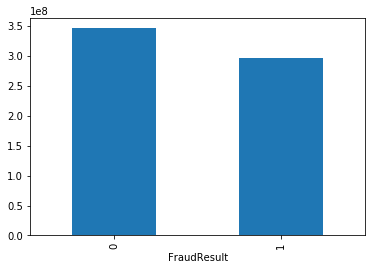

In [7]:
train_df.groupby('FraudResult').sum()['Amount'].plot(kind = 'bar')

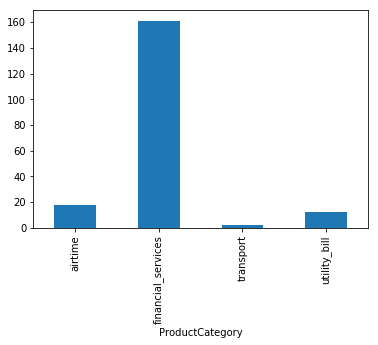

In [8]:
train_df[train_df['FraudResult'] == 1].groupby('ProductCategory').sum()['FraudResult'].plot(kind = 'bar')

In [9]:
train_df.shape

(95662, 16)

In [10]:
test_df['FraudResult'].isna().sum()

0

In [11]:
#train_df = train_df.iloc[0 : int(len(train_df) /20)]

In [12]:
id_cols  = ['TransactionId', 'TransactionStartTime', 'ChannelId', 'ProductId', 'ProviderId', 'CustomerId', 'SubscriptionId', 'BatchId', 'AccountId']
trans_id = train_df['TransactionId']

In [13]:
train_df = train_df.drop(id_cols, axis = 1)

In [14]:
train_df = pd.get_dummies(train_df)

In [15]:
train_df['TransactionId'] = trans_id

In [16]:
X = train_df.drop(['FraudResult'], axis = 1)
y = train_df['FraudResult']
#Id = train_df['TransactionId']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [18]:
test_ids = X_test['TransactionId']

In [19]:
X_test = X_test.drop('TransactionId', axis = 1)
X_train = X_train.drop('TransactionId', axis = 1)

In [20]:
'''Got this here https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
It helps with balancing this imbalanced dataset'''
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [21]:
lr = LogisticRegression(solver = 'liblinear')

In [22]:
model = lr.fit(X_train, y_train)

In [23]:
y_pred = model.predict(X_test)

In [24]:
sub = pd.DataFrame(test_ids)

In [25]:
sub['FraudResult'] = y_pred

In [26]:
sub

,TransactionId,FraudResult
39047,TransactionId_94004,0
16850,TransactionId_63380,0
54746,TransactionId_49027,0
30989,TransactionId_22661,0
28156,TransactionId_116098,0
61599,TransactionId_120490,0
37664,TransactionId_140255,0
8484,TransactionId_28764,0
31954,TransactionId_31324,0
90014,TransactionId_119614,0


In [27]:
sub.to_csv('submission1.csv')

In [30]:
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
